In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df =pd.read_csv(r"C:\Users\U6056186\Downloads\train (3).csv",usecols=['Sex', 'Fare','Age','Survived'])

In [4]:
df.head()

,Survived,Sex,Age,Fare
0,0,male,22.0,7.2500
1,1,female,38.0,71.2833
2,1,female,26.0,7.9250
3,1,female,35.0,53.1000
4,0,male,35.0,8.0500


In [5]:
df.columns

Index(['Survived', 'Sex', 'Age', 'Fare'], dtype='object')

In [6]:
df.isnull().mean()*100

Survived     0.00000
Sex          0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [7]:
X=df.drop(['Survived'],axis=1)
y=df['Survived']

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
X_train.head()

,Sex,Age,Fare
331,male,45.5,28.5000
733,male,23.0,13.0000
382,male,32.0,7.9250
704,male,26.0,7.8542
813,female,6.0,31.2750


In [10]:
X_train['Age_imp'] = X_train['Age']
X_test['Age_imp'] = X_test['Age']

In [11]:
X_train.head()

,Sex,Age,Fare,Age_imp
331,male,45.5,28.5000,45.5
733,male,23.0,13.0000,23.0
382,male,32.0,7.9250,32.0
704,male,26.0,7.8542,26.0
813,female,6.0,31.2750,6.0


In [12]:
X_test.head()

,Sex,Age,Fare,Age_imp
709,male,NaN,15.2458,NaN
439,male,31.0,10.5000,31.0
840,male,20.0,7.9250,20.0
720,female,6.0,33.0000,6.0
39,female,14.0,11.2417,14.0


In [14]:
X_train['Age_imp'][X_train['Age_imp'].isnull()]=X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

C:\Users\U6056186\AppData\Local\Temp\ipykernel_9124\3962100997.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Age_imp'][X_train['Age_imp'].isnull()]=X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values


In [15]:
X_test['Age_imp'][X_test['Age_imp'].isnull()]=X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

C:\Users\U6056186\AppData\Local\Temp\ipykernel_9124\651279867.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Age_imp'][X_test['Age_imp'].isnull()]=X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values


In [19]:
X_train.head()

,Sex,Age,Fare,Age_imp
331,male,45.5,28.5000,45.5
733,male,23.0,13.0000,23.0
382,male,32.0,7.9250,32.0
704,male,26.0,7.8542,26.0
813,female,6.0,31.2750,6.0


<Axes: ylabel='Density'>

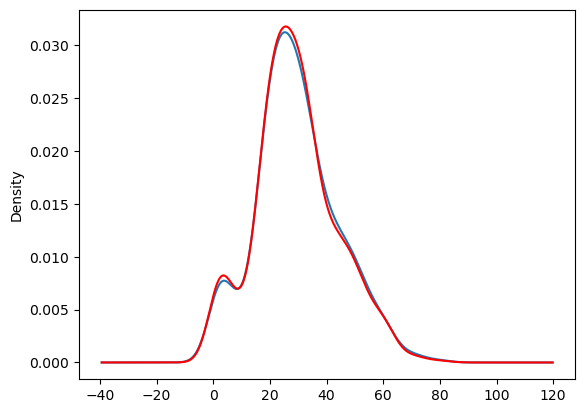

In [20]:
X_train['Age'].plot(kind='kde')
X_train['Age_imp'].plot(kind='kde',color='r')

In [23]:
X_train['Age'].var(), X_train['Age_imp'].var()

(210.2517072477438, 206.2499520850124)

In [25]:
X_train.corr()

C:\Users\U6056186\AppData\Local\Temp\ipykernel_9124\131534602.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  X_train.corr()


,Age,Fare,Age_imp
Age,1.000000,0.088103,1.000000
Fare,0.088103,1.000000,0.079373
Age_imp,1.000000,0.079373,1.000000


<Axes: >

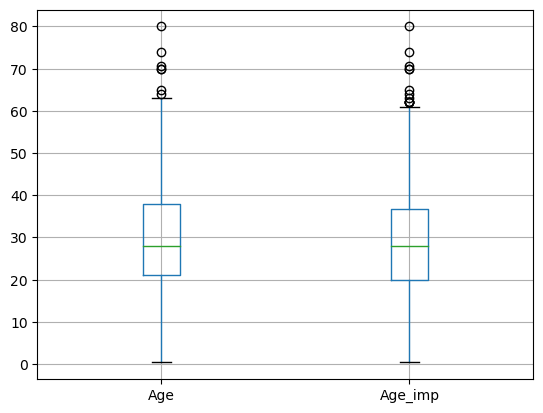

In [28]:
X_train[['Age','Age_imp']].boxplot()

In [34]:
X_train['Age'].dropna().sample(1,random_state=int(observation['Fare']))

NameError: name 'observation' is not defined

# Day 39: KNN Imputer

In [20]:
import numpy as np
import pandas as pd

from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [9]:
df = pd.read_csv(r"C:\Users\U6056186\Downloads\train.csv",
                 usecols=[ 'Age', 'Pclass','Fare','Survived'])

In [10]:
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [11]:
df.isnull().mean()*100

Survived     0.00000
Pclass       0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [12]:
X= df.drop(columns=['Survived'])
y= df['Survived']

In [13]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,
                                                  random_state=2)

In [14]:
X_train.head()

,Pclass,Age,Fare
30,1,40.0,27.7208
10,3,4.0,16.7000
873,3,47.0,9.0000
182,3,9.0,31.3875
876,3,20.0,9.8458


In [24]:
knn = KNNImputer(weights='uniform')
X_train_trf = knn.fit_transform(X_train)
X_test_trf =knn.transform(X_test)

In [25]:
lr = LogisticRegression()

lr.fit(X_train_trf,y_train)

y_pred = lr.predict(X_test_trf)

accuracy_score(y_test,y_pred)

0.7039106145251397

In [26]:
si = SimpleImputer()

X_train_trf2 = si.fit_transform(X_train)
X_test_trf2 = si.transform(X_test)


In [27]:
lr = LogisticRegression()

lr.fit(X_train_trf2,y_train)

y_pred = lr.predict(X_test_trf2)

accuracy_score(y_test,y_pred)

0.6927374301675978